# Introduction

First, we load the packages that we will need for this session. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## One Sample t-test

The file `smoking_mum_baby_wt.csv` contains the weights of 47 babies born to mothers who smoked. In this section, we shall test whether the mean weight of those babies was significantly different from 3.5 kilograms.

### Hypothesis Testing Steps

In [2]:
baby_wts = pd.read_csv('../data/smoking_mum_baby_wt.csv', header=0)

From the boxplot, it does seem as the though the median weight of babies is less than 3.5 kg.

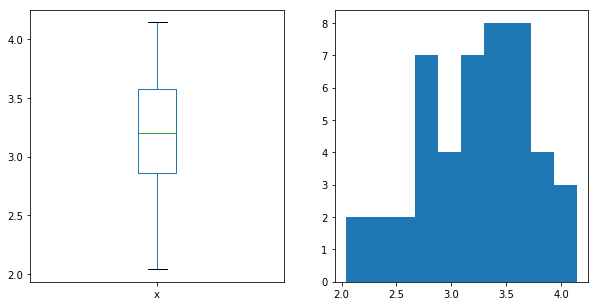

In [5]:
plt.figure(1, figsize=(10, 5))
plt.subplot(121) # 1 row 2 block 
baby_wts.x.plot(kind='box') 
# middle line = median, box的长是interquantile (IQT), 最上面的短线是1.5倍IQR，但如果最大值小于，则取最大值。
# 这里的形状表明数据是不对称的，是left skewed，不过中间的情况不清楚，可能有几个坡度。
plt.subplot(122)
baby_wts.x.hist(grid=False)
plt.show()

### Step 1: Assumptions of One Sample t-test

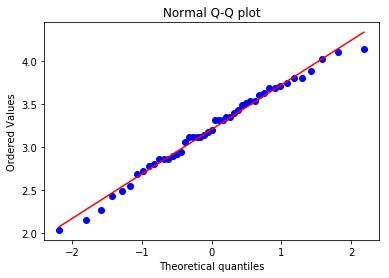

In [6]:
stats.probplot(baby_wts.x, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()
# 横轴是正态分布的quantile
# 纵轴是样本的quantile
# 主要关注两边，可见有轻微左偏。

The quantile-quantile plot above is a visual comparison between a dataset and 
a theoretical Normal distribution. If most of the points are close to the line, we would conclude that the data is from a Normal distribution. From the plots above, we would conclude that it is reasonable to assume that the data is from a Normal distribution. The assumption holds; we can proceed to the next step of the test.

### Step 2: The Null and Alternative Hypothesis

The statement of the hypotheses in this case would be 

\begin{eqnarray}
H_0 &:& \mu = 3.50 \\
H_1 &:& \mu \ne 3.50 
\end{eqnarray}

Remember that null and alternative hypotheses cannot have any overlap in the regions that they specify.

### Steps  3 and 4: Test Statistic and Comparison to Null Distribution

In [7]:
ts = stats.ttest_1samp(baby_wts.x, 3.50)
print(' The test statistic value is {:.3f}.'.format(ts[0]))
print(' The corresponding p-value is {:.3f}.'.format(ts[1]))

 The test statistic value is -3.957.
 The corresponding p-value is 0.000.


In [16]:
ts = stats.ttest_1samp(baby_wts.x, 3.50)
print(' The test statistic value is {:.5f}.'.format(ts[0]))
print(' The corresponding p-value is {:.6f}.'.format(ts[1]))

 The test statistic value is -3.95659.
 The corresponding p-value is 0.000261.


In [8]:
ts
# P值非常非常小，因此拒绝原假设

Ttest_1sampResult(statistic=-3.9565927867710076, pvalue=0.0002609655465493577)

In [10]:
'{0} is cold {1}'. format('weather','today')

'weather is cold today'

In [13]:
aa=['weather','today']

In [14]:
'{0} is cold {1}'. format(*aa)

'weather is cold today'

In [15]:
'{0} is cold {1}'. format(aa[0],aa[1])

'weather is cold today'

### Step 5: Conclusion from p-Value

We would conclude that we have strong evidence against the null hypothesis and that the mean weight of babies born to smoking mothers is significantly different from 3.50 kg.

# Comparing Means

## Independent Samples t-test

Forced Expiration Volume (FEV) is an index of pulmonary function, that measures the volume of air expelled after 1 second of constant effort. The dataset `fev.csv` contains measurements on 654 children in 1980. 

In the dataset, 0 represents a female and 1 represents a male. Similarly, in the smoking column, 0 represents a non-smoker and 1 represents a smoker.

Let us perform a two-sample t-test to assess if the mean FEV for males is different from mean FEV for females.

In [18]:
fev = pd.read_csv('../data/fev.csv', header=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000152EE3A3F28>,
      dtype=object)

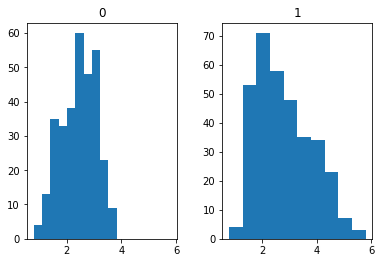

In [19]:
fev.hist('fev', 'Sex', sharex=True, xrot=True)

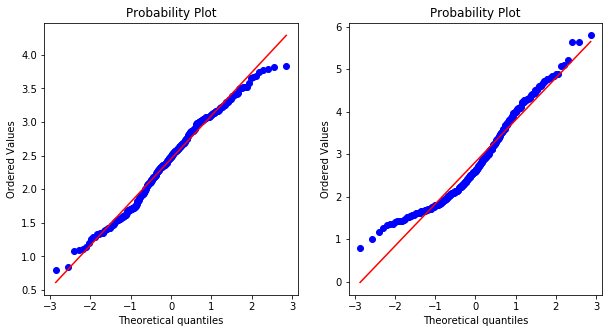

In [20]:
plt.figure(1, figsize=(10, 5))
plt.subplot(121)
stats.probplot(fev.fev[fev.Sex == 0], dist="norm", plot=plt)
plt.subplot(122)
stats.probplot(fev.fev[fev.Sex == 1], dist="norm", plot=plt)
plt.show()

In [21]:
fev.groupby('Sex').fev.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
0,318.0,2.451170,0.645736,0.791,1.9485,2.486,2.99175,3.835
1,336.0,2.812446,1.003598,0.796,2.0085,2.606,3.53475,5.793


It looks like the assumptions regarding Normality and equal variances are in order. We can proceed with the two-sample t-test with equal variances.

In [11]:
ts2 = stats.ttest_ind(fev.fev[fev.Sex == 0], fev.fev[fev.Sex == 1])
print(' The test statistic value is {:.3f}.'.format(ts2[0]))
print(' The corresponding p-value is {:.3f}.'.format(ts2[1]))

 The test statistic value is -5.441.
 The corresponding p-value is 0.000.


## Dependent Samples t-test

A study was conducted on a sample of 10 patients with kidney disease. After measuring their protein level, they were all treated with a new drug over an 8-week period. The level of protein in their urine was then measured once more.

It is of interest to determine if the amount of protein in the urine has changed significantly, indicating that the drug has an effect. The data is contained in the file `urine.csv`.

In [ ]:
# For the same sample, test the before and after diff.

In [22]:
renal = pd.read_csv('../data/urine.csv', header=0)
stats.ttest_rel(renal.before, renal.after)

Ttest_relResult(statistic=3.488655749971471, pvalue=0.006844619840710826)

## Comparing More Than 2 Groups

Three different concentrations of fertiliser have been used on a particular plant species. Each concentration is applied to 5 randomly selected plants, and their growth is measured after 2 weeks. In addition, there was a control group, where no fertiliser was used.

In [ ]:
#多样本均值检验

In [24]:
growth = pd.read_csv('../data/growth.csv', header=0)
growth

,growth,conc_levels
0,6.8,control
1,7.3,control
2,6.3,control
3,6.9,control
4,7.1,control
5,8.2,conc1
6,8.7,conc1
7,9.4,conc1
8,9.2,conc1
9,8.6,conc1


In [26]:
# Creates a list of pandas Series
x = [growth.growth[growth.conc_levels == ll] for ll in np.unique(growth.conc_levels)]

In [29]:
x

[5    8.2
 6    8.7
 7    9.4
 8    9.2
 9    8.6
 Name: growth, dtype: float64, 10    7.7
 11    8.4
 12    8.6
 13    8.1
 14    8.0
 Name: growth, dtype: float64, 15    6.9
 16    5.8
 17    7.2
 18    6.8
 19    7.4
 Name: growth, dtype: float64, 20    5.9
 21    6.1
 22    6.9
 23    5.7
 24    6.1
 Name: growth, dtype: float64, 0    6.8
 1    7.3
 2    6.3
 3    6.9
 4    7.1
 Name: growth, dtype: float64]

In [27]:
x[1]

10    7.7
11    8.4
12    8.6
13    8.1
14    8.0
Name: growth, dtype: float64

In [30]:
stats.f_oneway(*x)
# Alternative, more explicit code:
# stats.f_oneway(x[0], x[1], x[2], x[3], x[4])

F_onewayResult(statistic=27.49494020239188, pvalue=7.038715075177465e-08)

# Contingency Tables

## Chest Pain and Gender

In [ ]:
#whether chest pain ia associated with sex.

In [32]:
chest_pain = np.array([[46, 474], [37, 516]])

In [33]:
chest_pain

array([[ 46, 474],
       [ 37, 516]])

In [34]:
stats.chi2_contingency(chest_pain, correction=True)

(1.4555294041803708,
 0.2276427809700174,
 1,
 array([[ 40.22367195, 479.77632805],
        [ 42.77632805, 510.22367195]]))

In [35]:
chi2,p, _, exp = stats.chi2_contingency(chest_pain, correction=True) #_,表示drop某变量

In [39]:
np.round(p, 2) # cannot reject null hy.

0.23

The expected cell counts are automatically computed and returned to us. We can inspect them in the following manner. Notice that the expected counts are **not** integers. They are real numbers.

In [40]:
np.round(exp, 2)

array([[ 40.22, 479.78],
       [ 42.78, 510.22]])

For the p-value, we find that it is approximately 0.23. This is not extremely small. Hence we say that we do not have strong evidence against the null hypothesis; the two variables are not associated.

To quantify the association, we can describe it in the following ways. 

### Difference in proportion

The difference in proportion could take values between -1 and 1. A value close to 0 denotes that the two proportions are similar.

In [108]:
p_hats = chest_pain[:, 1] / np.sum(chest_pain,axis=1)
print('The difference in proportions is {:.3f}'.format(np.ptp(p_hats)))

The difference in proportions is 0.022


### Risk Ratio

Using the risk ratio is preferrable when the proportions for both groups is close to 0, ot both are close to 1. The risk ratio takes on values between 0 and infinity. A value close to 1 denotes that the proportions are similar to one another.

In [111]:
print('The proportion of CVD for women is {:.2f}'.format(p_hats[1]/p_hats[0]),
      'times the proportion of CVD for men.')

The proportion of CVD for women is 1.02 times the proportion of CVD for men.


### Fisher's Exact Test

If any of the *expected cell counts* are less than 5, we have two options:

1. Combine cell counts so that the expected values exceed the threshold of 5.
2. Perform Fisher's Exact Test

In the dataset above, the expected cell counts are all above 5, but let us perform the Exact test and see if there is a great difference in results.

In [41]:
stats.fisher_exact(chest_pain)

(1.3534040369483407, 0.20887769066760675)

The p-value is very similar: 0.21. In smaller sample sizes, the results may be quite different; in those cases, we should use the Fisher Test result, as it does not make distributional assumptions on the data.